In [27]:
# Importation des librairies
import random
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely.geometry import LineString

palette = sns.color_palette(None, 4)

In [70]:
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.4, 0.6],
    row_heights=[3],
    specs=[[{"type": "xy"},
           {"type": "surface"}]],
    subplot_titles=[
        'A. Niche en 1 dimension', 
        'B. Niche en 2 dimensions'])

In [17]:
x = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, x)
Z = np.array([[stats.norm.pdf(X[i,j], loc=10, scale=3)*stats.norm.pdf(Y[i,j], loc=10, scale=3)/(stats.norm.pdf(10, loc=10, scale=3)**2) for i in range(100)]for j in range(100)])

layout = go.Layout(width = 700, height =700,
                           scene = dict(
                              xaxis = dict(nticks=4, range=[0,20],),
                              yaxis = dict(nticks=4, range=[0,20],),
                              zaxis = dict(nticks=4, range=[0,1],),
                              xaxis_title="Température",
                              yaxis_title="Précipitations",
                              zaxis_title="Survie de l'espèce"))

In [71]:
fig.add_trace(
    go.Line(x = x, y = np.divide(stats.norm.pdf(x, loc=10, scale=3),[stats.norm.pdf(10, loc=10, scale=3)]*100))
)
fig.add_trace(
    go.Surface(x = X, y = Y, z=Z, colorscale = [[0, 'rgb(50,50,50)'], [1, 'rgb(255,100,100)']],opacity=1),
    row=1, col=2
)
fig.update_xaxes(title_text="Variable environnementale", row=1, col=1)
fig.update_yaxes(title_text="Survie de l'espèce", row=1, col=1)
fig.update_scenes(xaxis_title_text="Variable 1",
                  yaxis_title_text="Variable 2",
                  zaxis_title_text="Survie de l'espèce",
                  row=1, col=2)

fig.update_layout(
    margin=dict(r=0, t=20, b=0, l=0))

fig.show()

In [39]:
layout = go.Layout(width = 700, height =700,
                           scene = dict(
                              xaxis = dict(nticks=4, range=[0,20],),
                              yaxis = dict(nticks=4, range=[0,20],),
                              zaxis = dict(nticks=4, range=[0,1],),
                              xaxis_title="Température",
                              yaxis_title="Précipitations",
                              zaxis_title="Survie de l'espèce"))
fig = go.Figure(layout=layout)

fig.add_surface(x = X, y = Y, z=Z, colorscale = [[0, 'rgb(50,50,50)'], [1, 'rgb(255,100,100)']],opacity=1)

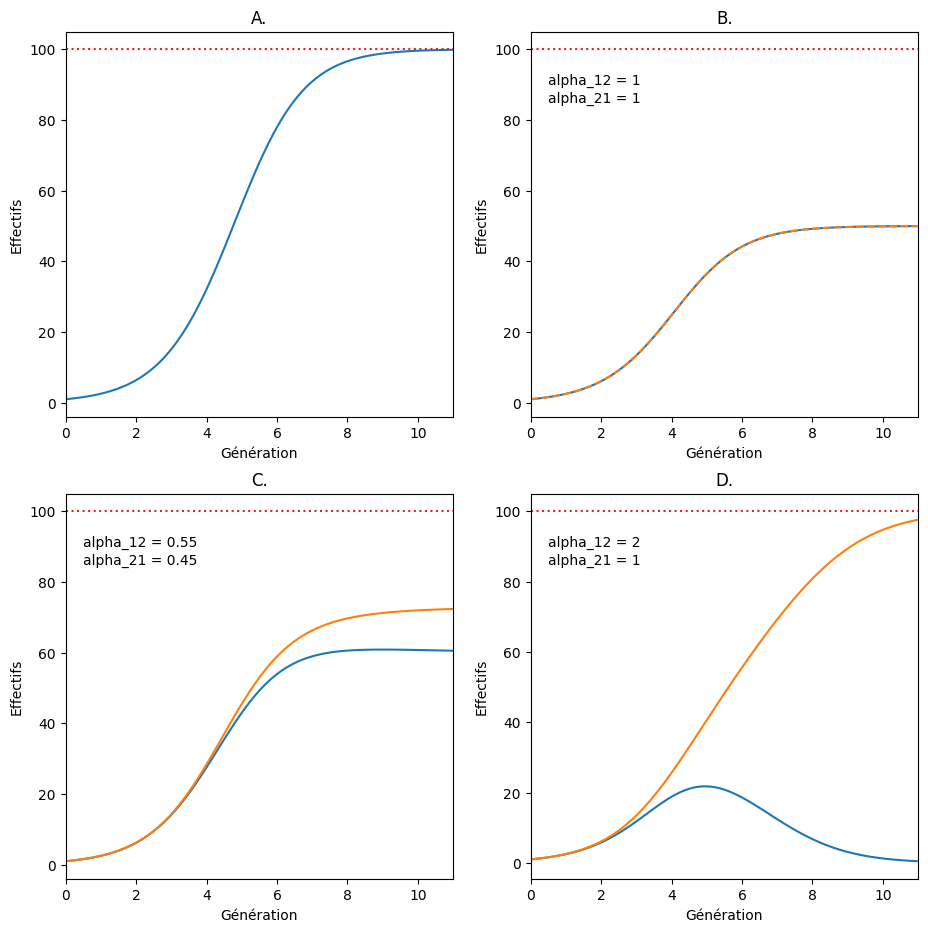

In [70]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(11,11)
ax1.set_xlabel("Génération")
ax2.set_xlabel("Génération")
ax3.set_xlabel("Génération")
ax4.set_xlabel("Génération")
ax1.set_ylabel("Effectifs")
ax2.set_ylabel("Effectifs")
ax3.set_ylabel("Effectifs")
ax4.set_ylabel("Effectifs")
ax1.set_title("A.")
ax2.set_title("B.")
ax3.set_title("C.")
ax4.set_title("D.")


ax1.set_xlim(0,11)
x = np.linspace(0,11,111)
y = [1]
for i in range(110) :
    y = y + [y[i] + y[i]*0.1*(1-y[i]/100)]
ax1.plot(x,y, c=palette[0])
ax1.plot([0,11],[100,100], c=palette[3], linestyle ='dotted')

ax2.set_xlim(0,11)
ya = [1]
yb = [1]
for i in range(110) :
    ya = ya + [ya[i] + ya[i]*0.1*(1-(ya[i]+yb[i])/100)]
    yb = yb + [yb[i] + yb[i]*0.1*(1-(yb[i]+ya[i])/100)]
ax2.plot(x,ya, c=palette[0])
ax2.plot(x,yb, c=palette[1],linestyle ='dashed')
ax2.plot([0,11],[100,100], c=palette[3], linestyle ='dotted')

ax3.set_xlim(0,11)
ya = [1]
yb = [1]
for i in range(110) :
    ya = ya + [ya[i] + ya[i]*0.1*(1-(ya[i]+0.55*yb[i])/100)]
    yb = yb + [yb[i] + yb[i]*0.1*(1-(yb[i]+0.45*ya[i])/100)]
ax3.plot(x,ya, c=palette[0])
ax3.plot(x,yb, c=palette[1])
ax3.plot([0,11],[100,100], c=palette[3], linestyle ='dotted')

ax4.set_xlim(0,11)
ya = [1]
yb = [1]
for i in range(110) :
    ya = ya + [ya[i] + ya[i]*0.1*(1-(ya[i]+2*yb[i])/100)]
    yb = yb + [yb[i] + yb[i]*0.1*(1-(yb[i]+ya[i])/100)]
ax4.plot(x,ya, c=palette[0], label = "Espèce 1")
ax4.plot(x,yb, c=palette[1], label = "Espèce 2")
ax4.plot([0,11],[100,100], c=palette[3], linestyle ='dotted')

ax2.annotate(str('alpha_12 = 1'), xy=(0.5,90), xycoords='data')
ax2.annotate(str('alpha_21 = 1'), xy=(0.5,85), xycoords='data')

ax3.annotate(str('alpha_12 = 0.55'), xy=(0.5,90), xycoords='data')
ax3.annotate(str('alpha_21 = 0.45'), xy=(0.5,85), xycoords='data')

ax4.annotate(str('alpha_12 = 2'), xy=(0.5,90), xycoords='data')
ax4.annotate(str('alpha_21 = 1'), xy=(0.5,85), xycoords='data')

plt.show()

In [71]:
fig.savefig('LK.png')

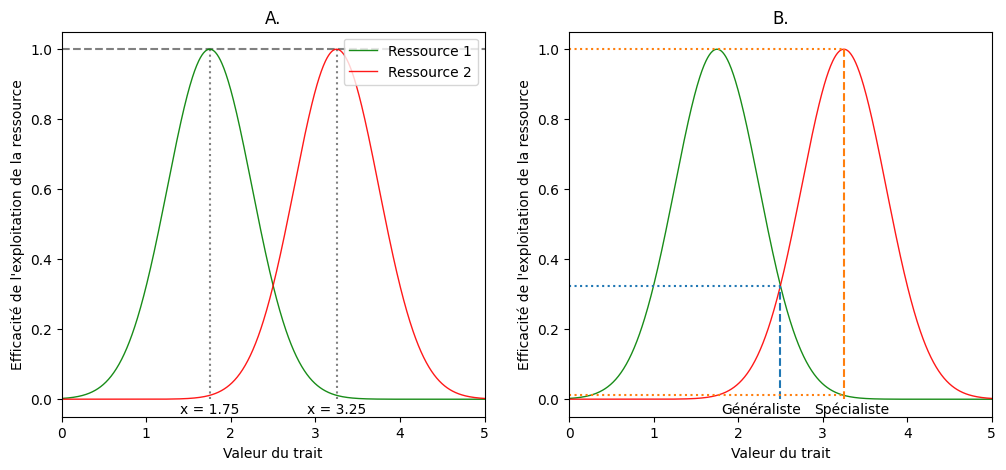

In [51]:
fig1, (ax1, ax2)= plt.subplots(1, 2)
fig1.set_size_inches(12,5)
ax1.set_title("A.")
ax1.set_xlim(0,5)
ax1.set_xlabel("Valeur du trait")
ax1.set_ylabel("Efficacité de l'exploitation de la ressource")
# standard deviation of normal distribution
sigma = 0.5
# mean of normal distribution
mu1 = 1.75
mu2 = 3.25

x1 = np.linspace(stats.norm.ppf(0.000001, loc=mu1, scale=sigma),
                stats.norm.ppf(0.99999999999999, loc=mu1, scale=sigma), 1000)
y1 = stats.norm.pdf(x1, loc=mu1, scale=sigma)
y1 = np.divide(y1,[stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*1000)
x2 = np.linspace(stats.norm.ppf(0.00000000000001, loc=mu2, scale=sigma),
                stats.norm.ppf(0.999999, loc=mu2, scale=sigma), 1000)
y2 = stats.norm.pdf(x2, loc=mu2, scale=sigma)
y2 = np.divide(y2,[stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*1000)

ax1.plot([0,5],[1,1],color ='grey', linestyle = 'dashed')
ax1.plot([1.75,1.75],[0,1],color ='grey', linestyle = 'dotted')
ax1.plot([3.25,3.25],[0,1],color ='grey', linestyle = 'dotted')
ax1.annotate(str('x = 1.75'), xy=(1.4,-0.04), xycoords='data')
ax1.annotate(str('x = 3.25'), xy=(2.9,-0.04), xycoords='data')

ax1.plot(x1, y1,
        'g-', lw=1, alpha=0.9, label='Ressource 1')
ax1.plot(x2, y2,
        'r-', lw=1, alpha=0.9, label='Ressource 2')

ax1.legend(loc="upper right")

ax2.set_title("B.")
ax2.set_xlim(0,5)
ax2.set_xlabel("Valeur du trait")
ax2.set_ylabel("Efficacité de l'exploitation de la ressource")
# standard deviation of normal distribution
sigma = 0.5
# mean of normal distribution
mu1 = 1.75
mu2 = 3.25

x1 = np.linspace(stats.norm.ppf(0.000001, loc=mu1, scale=sigma),
                stats.norm.ppf(0.99999999999999, loc=mu1, scale=sigma), 1000)
y1 = stats.norm.pdf(x1, loc=mu1, scale=sigma)
y1 = np.divide(y1,[stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*1000)
x2 = np.linspace(stats.norm.ppf(0.00000000000001, loc=mu2, scale=sigma),
                stats.norm.ppf(0.999999, loc=mu2, scale=sigma), 1000)
y2 = stats.norm.pdf(x2, loc=mu2, scale=sigma)
y2 = np.divide(y2,[stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*1000)

ax2.plot(x1, y1,
        'g-', lw=1, alpha=0.9)
ax2.plot(x2, y2,
        'r-', lw=1, alpha=0.9, label='Ressource 2')
first_line = LineString(np.column_stack((x1, y1)))
second_line = LineString(np.column_stack((x2, y2)))
intersection = first_line.intersection(second_line)
xint, yint = intersection.xy
ax2.plot([xint[0],xint[0]],[0,yint[0]], color = palette[0], linestyle = 'dashed')
ax2.plot([0,xint[0]],[yint[0],yint[0]], color = palette[0], linestyle = 'dotted')

ax2.plot([0,mu2],
        [1]*2, color = palette[1], linestyle = 'dotted')
ax2.plot([0,mu2],
        [stats.norm.pdf(mu2, loc=mu1, scale=sigma)/stats.norm.pdf(mu2, loc=mu2, scale=sigma)]*2, color = palette[1], linestyle = 'dotted')
ax2.plot([mu2]*2,
        [0,1], color = palette[1], linestyle = 'dashed')
ax2.annotate(str('Généraliste'), xy=(1.8,-0.04), xycoords='data')
ax2.annotate(str('Spécialiste'), xy=(2.9,-0.04), xycoords='data')

plt.show()

In [52]:
fig1.savefig('Ressource.png')

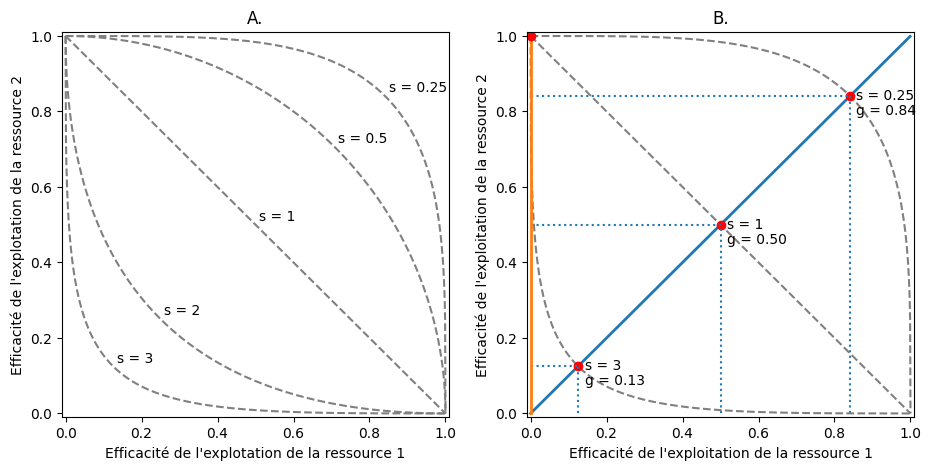

In [39]:
s = [0.25,0.5,1,2,3]

fig2, (ax1, ax2) = plt.subplots(1, 2)
fig2.set_size_inches(11,5)
ax1.set_title("A.")
ax1.set_xlim(-0.01,1.01)
ax1.set_ylim(-0.01,1.01)
ax1.set_xlabel("Efficacité de l'explotation de la ressource 1")
ax1.set_ylabel("Efficacité de l'explotation de la ressource 2")
x = np.linspace(0,1,1000)
xlab = [i/500*0.5 for i in range(1000)]
ylab = [i/500 - i/500*0.5 for i in range(1000)]
for i in range(len(s)):
    y = (1-(x)**(1/s[i]))**s[i]
    first_line = LineString(np.column_stack((x, y)))
    lab_line = LineString(np.column_stack((xlab, ylab)))
    intersection_lab = first_line.intersection(lab_line)
    ax1.plot(x, y, color = 'grey', linestyle = 'dashed')
    lab1, lab2 = intersection_lab.xy
    ax1.annotate(str('s = '+str(s[i])), xy=(lab1[0]+0.01,lab2[0]+0.01), xycoords='data')

reg = 0.5
s = [0.25,1,3]

ax2.set_xlim(-0.01,1.01)
ax2.set_ylim(-0.01,1.01)
ax2.set_title("B.")
ax2.set_xlabel("Efficacité de l'exploitation de la ressource 1")
ax2.set_ylabel("Efficacité de l'exploitation de la ressource 2")
x = np.linspace(0,1,1000)
xgen = [i/500*reg for i in range(1000)]
ygen = [i/500 - i/500*reg for i in range(1000)]
xlab = [i/500*0.5 for i in range(1000)]
ylab = [i/500 - i/500*0.5 for i in range(1000)]
ax2.plot(xgen, ygen, lw=2)
for i in range(len(s)):
    y = (1-(x)**(1/s[i]))**s[i]
    first_line = LineString(np.column_stack((x, y)))
    second_line = LineString(np.column_stack((xgen, ygen)))
    lab_line = LineString(np.column_stack((xlab, ylab)))
    intersection = first_line.intersection(second_line)
    intersection_lab = first_line.intersection(lab_line)
    ax2.plot(x, y, color = 'grey', linestyle = 'dashed')
    ax2.plot(*intersection.xy, 'ro')
    lab1, lab2 = intersection_lab.xy
    ax2.annotate(str('s = '+str(s[i])), xy=(lab1[0]+0.017,lab2[0]-0.01), xycoords='data')
    ax2.plot([0,lab1[0]],[lab2[0],lab2[0]], color = palette[0], linestyle = 'dotted')
    ax2.plot([lab1[0],lab1[0]],[0,lab2[0]], color = palette[0], linestyle = 'dotted')
    ax2.annotate(str('g = '+f"{lab1[0]:.2f}"), xy=(lab1[0]+0.017,lab2[0]-0.05), xycoords='data')
ax2.plot([0,0],[0,1], lw=2)
ax2.plot(0,1,'ro')
plt.show()


In [40]:
fig2.savefig('Tradeoff.png')

In [5]:
s = [0.25,0.5,1,2,3]
x = np.linspace(0.01, 1, 100)
X, Y = np.meshgrid(x, x)
Z = np.array([[[max((1-(X[i,j])**(1/s[k])-(Y[i,j])**(1/s[k])),0)**s[k] for i in range(100)]for j in range(100)] for k in range(len(s))])
Z[Z==0] = -0.0000001

layout = go.Layout(width = 700, height =700,
                           scene = dict(
                              xaxis = dict(nticks=4, range=[0,1],),
                              yaxis = dict(nticks=4, range=[0,1],),
                              zaxis = dict(nticks=4, range=[0,1],),
                              xaxis_title="Efficacité dans la ressource 1",
                              yaxis_title="Efficacité dans la ressource 2",
                              zaxis_title="Efficacité dans la ressource 3"))
fig = go.Figure(layout=layout)

for i in range(len(s)):
    fig.add_surface(x = X, y = Y, z=Z[i], colorscale = [[0, 'rgb(150,150,150)'], [1, 'rgb(150,150,150)']], 
                    showscale=False, opacity=0.8)

fig.add_scatter3d(x = [0,1]
        , y = [0,1]
        , z = [0,1]
        , marker=dict(size=0.1, opacity = 0)
        , line=dict(
        color='blue',
        width=6)
        , showlegend=False)

fig.add_scatter3d(x = [0,1]
        , y = [0,0]
        , z = [0,0]
        , marker=dict(size=0.1, opacity = 0)
        , line=dict(
        color='orange',
        width=6)
        , showlegend=False)

fig.add_scatter3d(x = [1,1,0,0,0,1,1,0,0,0]
        , y = [0,1,1,0,0,0,1,1,0,0]
        , z = [0,0,0,0,1,1,1,1,1,1]
        , marker=dict(size=0.1, opacity = 0)
        , line=dict(
        color='black',
        width=3)
        , showlegend=False)

fig.add_scatter3d(x = [0,0]
        , y = [1,1]
        , z = [0,1]
        , marker=dict(size=0.1, opacity = 0)
        , line=dict(
        color='black',
        width=3)
        , showlegend=False)

fig.add_scatter3d(x = [1,1]
        , y = [1,1]
        , z = [0,1]
        , marker=dict(size=0.1, opacity = 0)
        , line=dict(
        color='black',
        width=3)
        , showlegend=False)

fig.add_scatter3d(x = [1,1]
        , y = [0,0]
        , z = [0,1]
        , marker=dict(size=0.1, opacity = 0)
        , line=dict(
        color='black',
        width=3)
        , showlegend=False)